In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start='2020-12-31', end='2024-12-31')

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-12-31,129.751572,131.756177,128.803051,131.110789,99116600
2021-01-04,126.544220,130.651208,123.952903,130.563205,143301900
2021-01-05,128.108810,128.822655,125.585942,126.035762,97664900
2021-01-06,123.796440,128.147899,123.581311,124.891640,155088000
2021-01-07,128.020767,128.715051,125.028533,125.517461,109578200


In [3]:
first_trading_day = data.iloc[0]
begin_price = first_trading_day[('Close', ticker)]
print('begin price:', begin_price)

last_trading_day = data.iloc[len(data) - 1]
end_price = last_trading_day[('Close', ticker)]
print('end price', end_price)

begin price: 129.75157165527344
end price 252.1999969482422


In [4]:
df = pd.read_csv('s&p500.csv')
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [5]:
# Make sure no duplicates
duplicates = df[df['Symbol'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Exchange, Symbol, Shortname, Longname, Sector, Industry, Currentprice, Marketcap, Ebitda, Revenuegrowth, City, State, Country, Fulltimeemployees, Longbusinesssummary, Weight]
Index: []


In [6]:
# Make sure no null values
missing = df[df['Symbol'].isnull()]
print(missing)

Empty DataFrame
Columns: [Exchange, Symbol, Shortname, Longname, Sector, Industry, Currentprice, Marketcap, Ebitda, Revenuegrowth, City, State, Country, Fulltimeemployees, Longbusinesssummary, Weight]
Index: []


# The Modern Portfolio Theory

In [7]:
############ Calculate the required annualized return rate ###########
def required_annualized_return_calculation(initial, duration, target):
    required_annualized_return = ((target / initial) ** (1/duration)) - 1
    required_annualized_return = format(required_annualized_return, '.2f')
    required_annualized_return = float(required_annualized_return)
    return required_annualized_return

initial = 100000
duration = 4
target = 150000

required_return = required_annualized_return_calculation(initial, duration, target)
print(f"Required Annualized Return: {required_return}")


Required Annualized Return: 0.11


In [6]:
########### Calculate the annual return of each stock in S&P 500 ##############
def annual_return_calculation():
    # Load S&P 500 tickers from the CSV file
    df = pd.read_csv('s&p500.csv')
    annual_return_dict = {}

    for ticker in df['Symbol']:
        try:
            data = yf.download(ticker, start='2020-12-31', end='2024-12-31')['Close']

            # If data is empty (which happens sometimes for yfinance)
            if data.empty:
                print(f"No data available for {ticker}")
                continue

            returns = data.pct_change().dropna()
            mean_daily_returns = returns.mean()
            annual_return = mean_daily_returns * 252

            # Add to dict
            annual_return_dict[ticker] = annual_return
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
            continue

    return annual_return_dict

annual_return_dict = annual_return_calculation()
print(annual_return_dict)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'AAPL': Ticker
AAPL    0.202212
dtype: float64, 'NVDA': Ticker
NVDA    0.729932
dtype: float64, 'MSFT': Ticker
MSFT    0.204516
dtype: float64, 'AMZN': Ticker
AMZN    0.13929
dtype: float64, 'GOOGL': Ticker
GOOGL    0.244372
dtype: float64, 'GOOG': Ticker
GOOG    0.246063
dtype: float64, 'META': Ticker
META    0.296089
dtype: float64, 'TSLA': Ticker
TSLA    0.32302
dtype: float64, 'AVGO': Ticker
AVGO    0.522389
dtype: float64, 'BRK-B': Ticker
BRK-B    0.181937
dtype: float64, 'WMT': Ticker
WMT    0.193436
dtype: float64, 'LLY': Ticker
LLY    0.436283
dtype: float64, 'JPM': Ticker
JPM    0.215305
dtype: float64, 'V': Ticker
V    0.124417
dtype: float64, 'MA': Ticker
MA    0.132818
dtype: float64, 'ORCL': Ticker
ORCL    0.299405
dtype: float64, 'XOM': Ticker
XOM    0.31493
dtype: float64, 'UNH': Ticker
UNH    0.134223
dtype: float64, 'COST': Ticker
COST    0.263347
dtype: float64, 'PG': Ticker
PG    0.085029
dtype: float64, 'HD': Ticker
HD    0.147573
dtype: float64, 'NFLX': Ticker
NFL

In [8]:
# Convert the dictionary to a DataFrame and export clean data to CSV
annual_return_cleaned = {k: float(v) for k, v in annual_return_dict.items()}

annual_return_df = pd.DataFrame(list(annual_return_cleaned.items()), columns=['Ticker', 'Annual Return'])
annual_return_df.to_csv('annual_returns2.csv', index=False)
annual2 = pd.read_csv('annual_returns2.csv')
annual2.head()

C:\Users\kathy\AppData\Local\Temp\ipykernel_21460\3614073998.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annual_return_cleaned = {k: float(v) for k, v in annual_return_dict.items()}  # Clean values


,Ticker,Annual Return
0,AAPL,0.202212
1,NVDA,0.729932
2,MSFT,0.204516
3,AMZN,0.139290
4,GOOGL,0.244372


In [9]:
annual_df = pd.read_csv('annual_returns.csv')

annual_return_dict2 = pd.Series(annual_df['Annual Return'].values, index=annual_df['Ticker']).to_dict()
print(annual_return_dict2)

{'AAPL': 0.2022115877332891, 'NVDA': 0.7299322892537026, 'MSFT': 0.2045164643146485, 'AMZN': 0.1392902405239493, 'GOOGL': 0.2443719312275754, 'GOOG': 0.2460630560689052, 'META': 0.2960890748113801, 'TSLA': 0.3230201416577287, 'AVGO': 0.5223887262209731, 'BRK-B': 0.1819374926522082, 'WMT': 0.1934358996881393, 'LLY': 0.4362826884700832, 'JPM': 0.2153045976772405, 'V': 0.124417440788869, 'MA': 0.1328183494980436, 'ORCL': 0.2994050862259995, 'XOM': 0.3149303997109504, 'UNH': 0.1342230703686923, 'COST': 0.2633467625061312, 'PG': 0.085028843632598, 'HD': 0.1475730831024852, 'NFLX': 0.2355834233424281, 'JNJ': 0.0152595189532688, 'BAC': 0.1543006647192575, 'CRM': 0.1703067304595441, 'ABBV': 0.1886638758607357, 'KO': 0.0715587249036853, 'TMUS': 0.153581083676866, 'CVX': 0.2042215943801686, 'MRK': 0.1106618830788924, 'WFC': 0.2845981456285951, 'CSCO': 0.1256934586034999, 'ACN': 0.1220194379609071, 'NOW': 0.2478865301919927, 'AXP': 0.2800514264877735, 'MCD': 0.1123554932124999, 'PEP': 0.048235807

In [9]:
########## Calculate the annual risks (standard deviations of returns) of stocks ##########
def stock_risk_calculation():
    df = pd.read_csv('s&p500.csv')
    risk_dict = {}

    for ticker in df['Symbol']:
        try:
            data = yf.download(ticker, start='2020-12-31', end='2024-12-31')['Close']

            if data.empty:
                print(f"No data available for {ticker}")
                continue

            returns = data.pct_change().dropna()
            std_dev = returns.std()
            annualized_risk = std_dev * np.sqrt(252)
            risk_dict[ticker] = annualized_risk
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
            continue
    return risk_dict

stock_risk_calculation()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'AAPL': Ticker
 AAPL    0.266247
 dtype: float64,
 'NVDA': Ticker
 NVDA    0.52856
 dtype: float64,
 'MSFT': Ticker
 MSFT    0.260958
 dtype: float64,
 'AMZN': Ticker
 AMZN    0.353056
 dtype: float64,
 'GOOGL': Ticker
 GOOGL    0.308483
 dtype: float64,
 'GOOG': Ticker
 GOOG    0.307422
 dtype: float64,
 'META': Ticker
 META    0.446764
 dtype: float64,
 'TSLA': Ticker
 TSLA    0.600633
 dtype: float64,
 'AVGO': Ticker
 AVGO    0.392281
 dtype: float64,
 'BRK-B': Ticker
 BRK-B    0.169078
 dtype: float64,
 'WMT': Ticker
 WMT    0.197185
 dtype: float64,
 'LLY': Ticker
 LLY    0.295408
 dtype: float64,
 'JPM': Ticker
 JPM    0.241445
 dtype: float64,
 'V': Ticker
 V    0.227258
 dtype: float64,
 'MA': Ticker
 MA    0.245127
 dtype: float64,
 'ORCL': Ticker
 ORCL    0.305746
 dtype: float64,
 'XOM': Ticker
 XOM    0.278509
 dtype: float64,
 'UNH': Ticker
 UNH    0.232052
 dtype: float64,
 'COST': Ticker
 COST    0.227316
 dtype: float64,
 'PG': Ticker
 PG    0.168466
 dtype: float64,
 

In [1]:
############### Calculate covariance matrix ###############
import yfinance as yf
import pandas as pd

def covariance_calculation():
    df = pd.read_csv('s&p500.csv')
    ticker_list = df['Symbol']

    returns_data = {}

    for ticker in ticker_list:
        data = yf.download(ticker, start='2020-12-31', end='2024-12-31')['Close']
        data = data.squeeze()

        # Calculate daily returns (simple returns)
        daily_returns = data.pct_change().dropna()
        returns_data[ticker] = daily_returns

    # Combine all daily returns into one DataFrame
    returns_df = pd.DataFrame(returns_data).dropna(how='any')

    # Calculate the daily covariance matrix
    daily_cov_matrix = returns_df.cov()

    # Annualize the daily covariance matrix
    # (Assuming ~252 trading days in a year)
    annual_cov_matrix = daily_cov_matrix * 252

    return annual_cov_matrix

try:
    cov_matrix = covariance_calculation()
    print(cov_matrix)
except Exception as e:
    print(f"An error occurred: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

           AAPL      NVDA      MSFT      AMZN     GOOGL      GOOG      META  \
AAPL   0.031697  0.012359  0.021217  0.018391  0.013565  0.013417  0.020038   
NVDA   0.012359  0.132833  0.032856  0.038205  0.022080  0.022106  0.035222   
MSFT   0.021217  0.032856  0.043723  0.043259  0.027316  0.027208  0.033128   
AMZN   0.018391  0.038205  0.043259  0.084860  0.045400  0.044753  0.044466   
GOOGL  0.013565  0.022080  0.027316  0.045400  0.081498  0.080143  0.038735   
...         ...       ...       ...       ...       ...       ...       ...   
CZR    0.023161  0.031950  0.026501  0.028370  0.020141  0.020118  0.037043   
BWA    0.009493 -0.000438  0.006620  0.006248  0.015844  0.015939  0.004144   
QRVO   0.038399  0.035488  0.016401  0.006170 -0.018891 -0.019570  0.014318   
FMC    0.012152 -0.007000  0.007302 -0.000132  0.014088  0.015312  0.007974   
AMTM   0.047399  0.053388  0.028714  0.034378  0.018149  0.018343  0.038066   

           TSLA      AVGO     BRK-B  ...       MOS 

In [2]:
### Store covariance matrix in a csv file to be used in app.py ####
cov_matrix.to_csv('cov_matrix.csv', index=True)
cov_matrix = pd.read_csv('cov_matrix.csv', index_col=0)
print(cov_matrix)

           AAPL      NVDA      MSFT      AMZN     GOOGL      GOOG      META  \
AAPL   0.031697  0.012359  0.021217  0.018391  0.013565  0.013417  0.020038   
NVDA   0.012359  0.132833  0.032856  0.038205  0.022080  0.022106  0.035222   
MSFT   0.021217  0.032856  0.043723  0.043259  0.027316  0.027208  0.033128   
AMZN   0.018391  0.038205  0.043259  0.084860  0.045400  0.044753  0.044466   
GOOGL  0.013565  0.022080  0.027316  0.045400  0.081498  0.080143  0.038735   
...         ...       ...       ...       ...       ...       ...       ...   
CZR    0.023161  0.031950  0.026501  0.028370  0.020141  0.020118  0.037043   
BWA    0.009493 -0.000438  0.006620  0.006248  0.015844  0.015939  0.004144   
QRVO   0.038399  0.035488  0.016401  0.006170 -0.018891 -0.019570  0.014318   
FMC    0.012152 -0.007000  0.007302 -0.000132  0.014088  0.015312  0.007974   
AMTM   0.047399  0.053388  0.028714  0.034378  0.018149  0.018343  0.038066   

           TSLA      AVGO     BRK-B  ...       MOS 

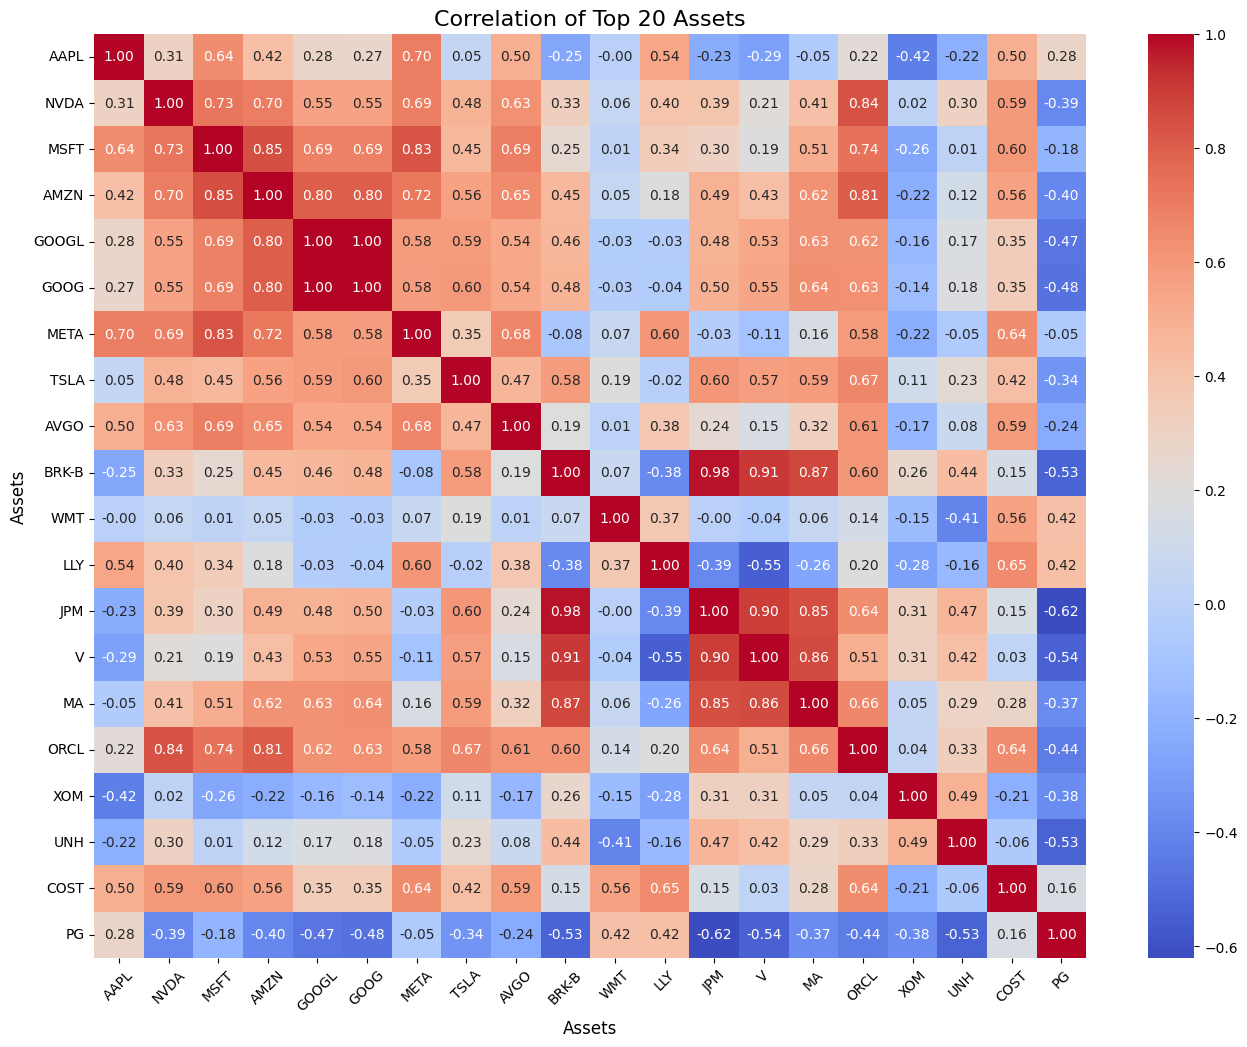

In [11]:
########## Visualize covariance matrix using DAILY RETURNS ##########
# Note: the covariance matrix used in app.py is annualized. This one uses daily returns.
def visualize_correlation_matrix(cov_matrix, limit=20):
    corr_matrix = cov_matrix.corr()
    
    if limit and len(corr_matrix) > limit:
        corr_matrix = corr_matrix.iloc[:limit, :limit]

    plt.figure(figsize=(16, 12)) 
    sns.heatmap(
        corr_matrix,
        annot=True,        
        fmt=".2f",
        cmap="coolwarm",
        cbar=True
    )
    plt.title("Correlation of Top {} Assets".format(limit), fontsize=16)
    plt.xlabel("Assets", fontsize=12)
    plt.ylabel("Assets", fontsize=12)
    plt.xticks(fontsize=10, rotation=45)  
    plt.yticks(fontsize=10)
    plt.show()

visualize_correlation_matrix(cov_matrix, limit=20)


In [12]:
########### Define portfolio performance function #############
def portfolio_performance(weights, annual_returns, cov_matrix):
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_risk

# Generate random portfolios
def generate_portfolios(annual_return_dict, cov_matrix, num_portfolios=10000):
    results = []
    weights_record = []
    tickers = list(annual_return_dict.keys())
    annual_returns = np.array(list(annual_return_dict.values()))

    for _ in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)

        portfolio_return, portfolio_risk = portfolio_performance(weights, annual_returns, cov_matrix)
        sharpe_ratio = portfolio_return / portfolio_risk

        results.append((portfolio_return, portfolio_risk, sharpe_ratio, weights))
        weights_record.append(weights)

    results_df = pd.DataFrame(results, columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])
    return results_df, weights_record

portfolios_df, weights_list = generate_portfolios(annual_return_dict, cov_matrix)


In [12]:
########## Get most recent stock prices ##########
def get_stock_prices():
    prices = {}
    df = pd.read_csv('s&p500.csv')
    
    for ticker in df['Symbol']:
        try:
            stock = yf.Ticker(ticker)
            prices[ticker] = stock.history(period='1d')['Close'][-1]
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    
    return prices

stock_prices = get_stock_prices()

print(stock_prices)

C:\Users\kathy\AppData\Local\Temp\ipykernel_21460\2784540895.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prices[ticker] = stock.history(period='1d')['Close'][-1]
C:\Users\kathy\AppData\Local\Temp\ipykernel_21460\2784540895.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prices[ticker] = stock.history(period='1d')['Close'][-1]
C:\Users\kathy\AppData\Local\Temp\ipykernel_21460\2784540895.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

{'AAPL': 243.5800018310547, 'NVDA': 143.86000061035156, 'MSFT': 421.9779968261719, 'AMZN': 224.44000244140625, 'GOOGL': 192.18499755859375, 'GOOG': 193.52499389648438, 'META': 601.489990234375, 'TSLA': 394.7207946777344, 'AVGO': 233.18600463867188, 'BRK-B': 453.4346923828125, 'WMT': 91.19499969482422, 'LLY': 780.4400024414062, 'JPM': 241.61000061035156, 'V': 313.9800109863281, 'MA': 521.030029296875, 'ORCL': 166.24000549316406, 'XOM': 107.92359924316406, 'UNH': 514.3900146484375, 'COST': 923.2000122070312, 'PG': 165.89999389648438, 'HD': 387.7699890136719, 'NFLX': 887.0, 'JNJ': 144.3300018310547, 'BAC': 44.400001525878906, 'CRM': 331.8450012207031, 'ABBV': 180.86000061035156, 'KO': 61.970001220703125, 'TMUS': 220.89999389648438, 'CVX': 147.8000030517578, 'MRK': 99.02999877929688, 'WFC': 70.62999725341797, 'CSCO': 58.965999603271484, 'ACN': 353.61260986328125, 'NOW': 1064.7188720703125, 'AXP': 300.1199951171875, 'MCD': 293.4700012207031, 'PEP': 150.8300018310547, 'BX': 175.0050048828125

In [13]:
#### Export to csv for later use in app.py ####
stock_prices_df = pd.DataFrame(list(stock_prices.items()), columns=['Ticker', 'Stock Price'])
stock_prices_df.to_csv('stock_prices.csv', index=False)

In [14]:
stock_prices_df = pd.read_csv('stock_prices.csv')

stock_prices_dict = pd.Series(stock_prices_df['Stock Price'].values, index=stock_prices_df['Ticker']).to_dict()

print(stock_prices_dict)


{'AAPL': 243.5800018310547, 'NVDA': 143.86000061035156, 'MSFT': 421.9779968261719, 'AMZN': 224.44000244140625, 'GOOGL': 192.18499755859372, 'GOOG': 193.5249938964844, 'META': 601.489990234375, 'TSLA': 394.7207946777344, 'AVGO': 233.18600463867188, 'BRK-B': 453.4346923828125, 'WMT': 91.19499969482422, 'LLY': 780.4400024414062, 'JPM': 241.6100006103516, 'V': 313.9800109863281, 'MA': 521.030029296875, 'ORCL': 166.24000549316406, 'XOM': 107.92359924316406, 'UNH': 514.3900146484375, 'COST': 923.2000122070312, 'PG': 165.89999389648438, 'HD': 387.7699890136719, 'NFLX': 887.0, 'JNJ': 144.3300018310547, 'BAC': 44.400001525878906, 'CRM': 331.8450012207031, 'ABBV': 180.8600006103516, 'KO': 61.970001220703125, 'TMUS': 220.8999938964844, 'CVX': 147.8000030517578, 'MRK': 99.02999877929688, 'WFC': 70.62999725341797, 'CSCO': 58.96599960327149, 'ACN': 353.61260986328125, 'NOW': 1064.7188720703125, 'AXP': 300.1199951171875, 'MCD': 293.4700012207031, 'PEP': 150.8300018310547, 'BX': 175.0050048828125, 'IB

In [21]:
######### Choose suitable portfolios based on conditions provided by users #########

def filter_portfolios(portfolios_df, required_return, stock_prices, initial):
    valid_portfolios = []

    for _, row in portfolios_df.iterrows():
        weights = row['Weights']  
        
        # Calculate the total cost of the portfolio
        total_cost = sum(
            w * initial / stock_prices[ticker] 
            for ticker, w in zip(stock_prices.keys(), weights)
        )
        
        # Ensure portfolio satisfies both return and cost constraints
        if row['Return'] >= required_return and total_cost <= initial:
            portfolio_data = dict(row)
            portfolio_data['Total Cost'] = total_cost
            valid_portfolios.append(portfolio_data)

    filtered_df = pd.DataFrame(valid_portfolios)
    
    if not filtered_df.empty:
        return filtered_df.sort_values(by='Sharpe Ratio', ascending=False).head(5)
    else:
        print("No portfolios satisfy the constraints.")
        return pd.DataFrame()  

top_5_portfolios = filter_portfolios(portfolios_df, required_return, stock_prices, initial)

print(top_5_portfolios)



                     Return      Risk          Sharpe Ratio  \
4052  [0.15368182277623466]  0.007215  [21.299127117116633]   
8536  [0.15553346693278575]  0.007332  [21.213132457373092]   
4207  [0.15344704102575651]  0.007312  [20.986274585462585]   
5113   [0.1512451880788993]  0.007210   [20.97722682311562]   
7858   [0.1487756484328538]  0.007095  [20.968991974600122]   

                                                Weights   Total Cost  
4052  [0.002818797218533839, 0.003194646872557185, 0...  1173.487725  
8536  [0.0029564270129371715, 0.0028888225847864906,...  1240.718784  
4207  [0.0012558421527640946, 0.0037904366124025166,...  1249.742385  
5113  [0.0031781567016124094, 0.0038970819892651786,...  1227.491075  
7858  [0.00010444926057313828, 0.0027292353982115796...  1238.140703  


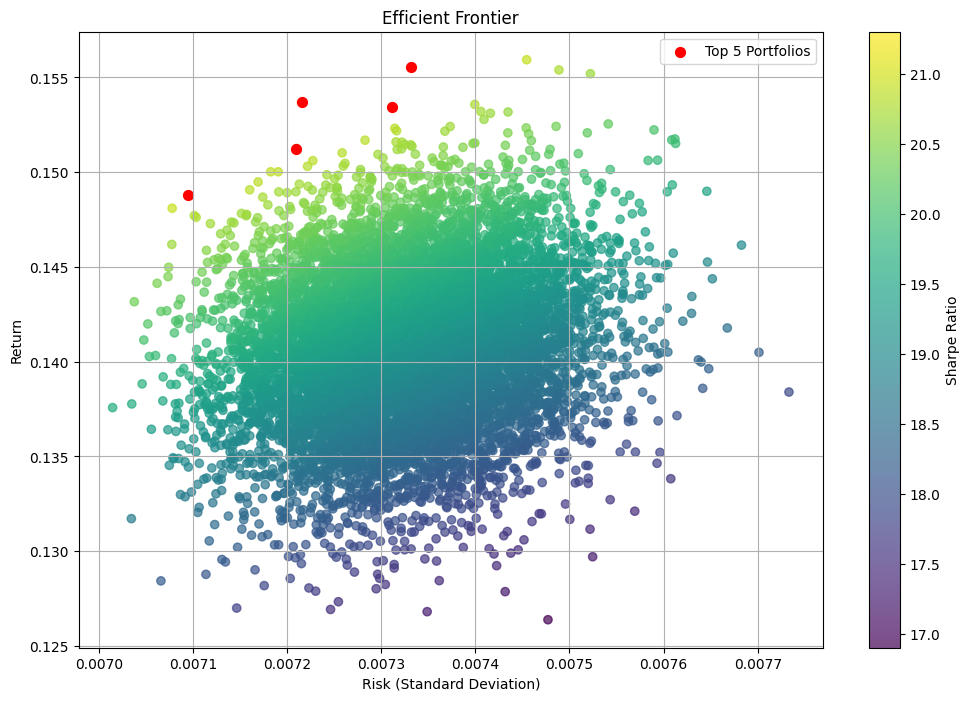

In [15]:
def plot_efficient_frontier(portfolios_df, top_5_portfolios):
    plt.figure(figsize=(12, 8))

    plt.scatter(portfolios_df['Risk'], portfolios_df['Return'], c=portfolios_df['Sharpe Ratio'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Sharpe Ratio')

    # Highlight top 5 portfolios
    plt.scatter(top_5_portfolios['Risk'], top_5_portfolios['Return'], c='red', s=50, label='Top 5 Portfolios')

    plt.title('Efficient Frontier')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_efficient_frontier(portfolios_df, top_5_portfolios)


In [16]:
######## Print top 5 portfolios ########
for i, row in top_5_portfolios.iterrows():
    print(f"Portfolio {i + 1}")
    
    portfolio_return = row['Return'][0] if isinstance(row['Return'], np.ndarray) else row['Return']
    portfolio_risk = row['Risk'][0] if isinstance(row['Risk'], np.ndarray) else row['Risk']
    sharpe_ratio = row['Sharpe Ratio'][0] if isinstance(row['Sharpe Ratio'], np.ndarray) else row['Sharpe Ratio']
    
    print(f"Return: {portfolio_return:.2%}")
    print(f"Risk: {portfolio_risk:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    
    formatted_weights = ', '.join([f"{weight:.2%}" for weight in row['Weights']])
    print(f"Weights: {formatted_weights}\n")


Portfolio 4053
Return: 15.37%
Risk: 0.72%
Sharpe Ratio: 21.30
Weights: 0.28%, 0.32%, 0.27%, 0.10%, 0.17%, 0.30%, 0.41%, 0.39%, 0.36%, 0.40%, 0.25%, 0.15%, 0.05%, 0.09%, 0.07%, 0.14%, 0.04%, 0.24%, 0.27%, 0.27%, 0.17%, 0.27%, 0.30%, 0.33%, 0.02%, 0.34%, 0.04%, 0.34%, 0.30%, 0.40%, 0.04%, 0.05%, 0.12%, 0.01%, 0.14%, 0.02%, 0.19%, 0.08%, 0.28%, 0.03%, 0.36%, 0.18%, 0.13%, 0.15%, 0.21%, 0.33%, 0.37%, 0.17%, 0.27%, 0.05%, 0.01%, 0.24%, 0.40%, 0.32%, 0.15%, 0.09%, 0.24%, 0.08%, 0.22%, 0.20%, 0.27%, 0.28%, 0.38%, 0.36%, 0.06%, 0.09%, 0.35%, 0.02%, 0.39%, 0.29%, 0.39%, 0.31%, 0.30%, 0.08%, 0.29%, 0.30%, 0.13%, 0.32%, 0.15%, 0.07%, 0.23%, 0.26%, 0.09%, 0.29%, 0.37%, 0.40%, 0.27%, 0.09%, 0.22%, 0.21%, 0.21%, 0.38%, 0.38%, 0.24%, 0.13%, 0.16%, 0.27%, 0.20%, 0.09%, 0.37%, 0.31%, 0.33%, 0.34%, 0.06%, 0.07%, 0.05%, 0.41%, 0.34%, 0.27%, 0.11%, 0.31%, 0.20%, 0.37%, 0.00%, 0.16%, 0.08%, 0.38%, 0.02%, 0.28%, 0.25%, 0.32%, 0.19%, 0.32%, 0.09%, 0.09%, 0.30%, 0.29%, 0.10%, 0.32%, 0.08%, 0.27%, 0.01%, 0.34%

In [17]:
########### Final results ###########
def calculate_quantities(top_5_portfolios, stock_prices, initial):
    portfolio_details = []
    
    for i, row in top_5_portfolios.iterrows():
        portfolio_weights = row['Weights']
        portfolio_costs = []
        stock_quantities = {}
        
        for stock, weight in zip(stock_prices.keys(), portfolio_weights):
            stock_allocation = weight * initial
            stock_price = stock_prices[stock]
            quantity = stock_allocation // stock_price  
            
            if quantity > 0:  
                portfolio_costs.append(quantity * stock_price)
                stock_quantities[stock] = quantity
        
        total_cost = sum(portfolio_costs)
        
        if total_cost <= initial:
            portfolio_details.append({
                'Portfolio': i + 1,
                'Stocks': stock_quantities,
                'Total Cost': total_cost,
                'Remaining Budget': initial - total_cost,
                'Return': float(row['Return']),
                'Risk': float(row['Risk']),
                'Sharpe Ratio': float(row['Sharpe Ratio'])
            })
    
    return portfolio_details

portfolio_details = calculate_quantities(top_5_portfolios, stock_prices, initial)

if portfolio_details:
    for portfolio in portfolio_details:
        print(f"Portfolio {portfolio['Portfolio']}:")
        print(f"  Stocks and Quantities: {portfolio['Stocks']}")
        print(f"  Total Cost: ${portfolio['Total Cost']:.2f}")
        print(f"  Remaining Budget: ${portfolio['Remaining Budget']:.2f}")
        print(f"  Return: {portfolio['Return']:.2%}")
        print(f"  Risk: {portfolio['Risk']:.2%}")
        print(f"  Sharpe Ratio: {portfolio['Sharpe Ratio']:.2f}\n")
else:
    print("No valid portfolios found within the given constraints.")


Portfolio 4053:
  Stocks and Quantities: {'NVDA': 2.0, 'AMZN': 1.0, 'GOOGL': 1.0, 'JPM': 1.0, 'ORCL': 2.0, 'JNJ': 2.0, 'ABBV': 1.0, 'DIS': 1.0, 'QCOM': 1.0, 'RTX': 1.0, 'AMGN': 1.0, 'UNP': 1.0, 'ETN': 1.0, 'COP': 3.0, 'ADP': 1.0, 'FI': 1.0, 'ADI': 1.0, 'CMG': 2.0, 'CTAS': 1.0, 'ZTS': 1.0, 'EMR': 1.0, 'ADSK': 1.0, 'MET': 4.0, 'CVS': 3.0, 'TRV': 1.0, 'PSX': 2.0, 'FANG': 2.0, 'D': 5.0, 'OXY': 2.0, 'FIS': 2.0, 'PCG': 11.0, 'TEL': 1.0, 'CCI': 2.0, 'DAL': 4.0, 'XEL': 5.0, 'A': 2.0, 'LVS': 1.0, 'SYY': 1.0, 'OTIS': 3.0, 'YUM': 2.0, 'KHC': 9.0, 'IQV': 1.0, 'GIS': 4.0, 'ROK': 1.0, 'TTWO': 1.0, 'HIG': 2.0, 'ED': 3.0, 'IRM': 1.0, 'MCHP': 1.0, 'TSCO': 4.0, 'FITB': 6.0, 'NUE': 2.0, 'EL': 5.0, 'BR': 1.0, 'WBD': 25.0, 'ADM': 1.0, 'HBAN': 13.0, 'CDW': 1.0, 'PHM': 1.0, 'CINF': 2.0, 'DRI': 2.0, 'SBAC': 1.0, 'ATO': 1.0, 'MKC': 3.0, 'ES': 3.0, 'PKG': 1.0, 'WY': 11.0, 'LUV': 9.0, 'LH': 1.0, 'SMCI': 2.0, 'HRL': 12.0, 'BLDR': 2.0, 'JBHT': 1.0, 'GEN': 4.0, 'DGX': 2.0, 'UDR': 8.0, 'KIM': 6.0, 'LNT': 6.0, 'BAX':

C:\Users\kathy\AppData\Local\Temp\ipykernel_20836\2761445641.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'Return': float(row['Return']),
C:\Users\kathy\AppData\Local\Temp\ipykernel_20836\2761445641.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'Sharpe Ratio': float(row['Sharpe Ratio'])


In [18]:
# Check if the target return users expect is too high for the investment and number of years they put in
print(f"Required Return: {required_return}")
print(f"Max Return in Portfolios: {portfolios_df['Return'].max()}")
print(f"Min Return in Portfolios: {portfolios_df['Return'].min()}")


Required Return: 0.11
Max Return in Portfolios: [0.15593332]
Min Return in Portfolios: [0.1263824]
